# Deep Neural Networks PyTorch

In [1]:
# !pip install torch

In [2]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
n_pts = 500
X,y = datasets.make_circles(n_samples = n_pts, random_state = 123, noise  = 0.1, factor = 0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))

In [4]:
def scatter_plot():
    plt.scatter(X[y==0,0],X[y==0,1])
    plt.scatter(X[y==1,0],X[y==1,1])

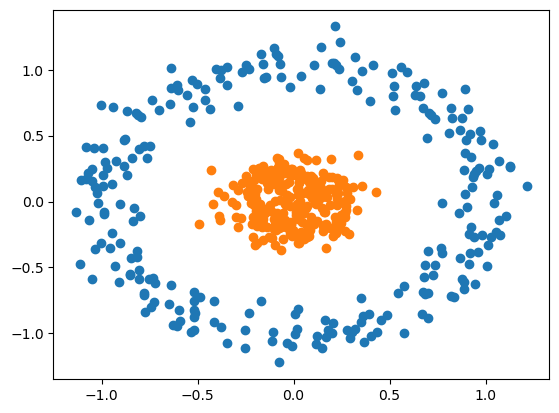

In [5]:
scatter_plot()

In [6]:
import torch.nn as nn

In [7]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
    def forward(self, x):
        x = torch.relu(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    def predict(self,x):
        pred = self.forward(x)
        if pred >=0.5:
            return 1
        else:
            return 0

In [8]:
torch.manual_seed(2)
model = Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [9]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [10]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print('epoch:', i, 'loss', loss.item())
    
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss 0.7069740891456604
epoch: 1 loss 0.6926109790802002
epoch: 2 loss 0.6841054558753967
epoch: 3 loss 0.679032564163208
epoch: 4 loss 0.6700819134712219
epoch: 5 loss 0.6576299071311951
epoch: 6 loss 0.6424412727355957
epoch: 7 loss 0.625659167766571
epoch: 8 loss 0.6091853976249695
epoch: 9 loss 0.5909883379936218
epoch: 10 loss 0.5715593695640564
epoch: 11 loss 0.5524454712867737
epoch: 12 loss 0.5346086621284485
epoch: 13 loss 0.5182031989097595
epoch: 14 loss 0.502781331539154
epoch: 15 loss 0.48791342973709106
epoch: 16 loss 0.47363990545272827
epoch: 17 loss 0.45990949869155884
epoch: 18 loss 0.44635969400405884
epoch: 19 loss 0.43277493119239807
epoch: 20 loss 0.41901057958602905
epoch: 21 loss 0.4051479697227478
epoch: 22 loss 0.39140281081199646
epoch: 23 loss 0.3768588602542877
epoch: 24 loss 0.36251020431518555
epoch: 25 loss 0.3489026129245758
epoch: 26 loss 0.33595409989356995
epoch: 27 loss 0.3222736120223999
epoch: 28 loss 0.30932682752609253
epoch: 29 loss 0.

Text(0, 0.5, 'Loss')

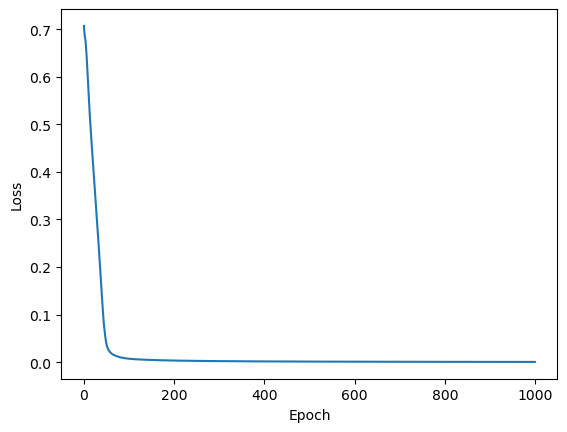

In [11]:
plt.plot(range(epochs),losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [12]:
def plot_decision_boundary(X,y):
    x_span = np.linspace(min(X[:,0])-0.25,max(X[:,0])+0.25)
    y_span = np.linspace(min(X[:,1])-0.25,max(X[:,1])+0.25)
    xx, yy = np.meshgrid(x_span,y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel() ])
    # ravel() pour transformer xx et yy en tableaux unidimensionnels, puis utilise np.c_[] pour concaténer les deux tableaux unidimensionnels en une seule matrice bidimensionnelle
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx,yy,z)

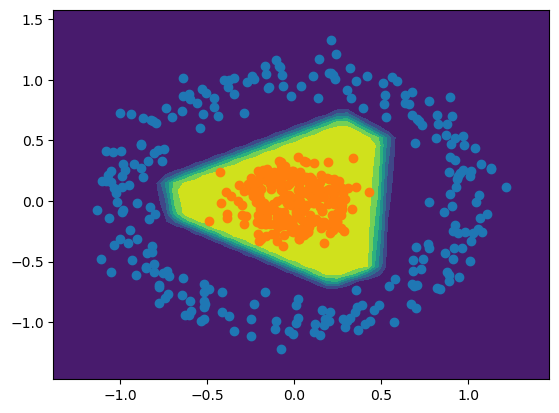

In [13]:
plot_decision_boundary(X,y)
scatter_plot()

Prediction is 1


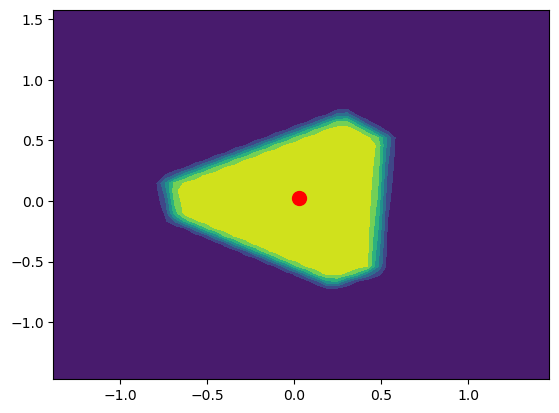

In [14]:
x = 0.025
y = 0.025
point = torch.tensor([x,y])
prediction = model.predict(point)
plt.plot([x],[y], marker ='o',markersize=10, color='red')
print('Prediction is', prediction)
plot_decision_boundary(X,y)